## Students
Please fill in your names and S/U-numbers:
* Linda Schmeitz, S1042449
* Enrico Schmitz, s1047521
* Charlotte Cambier van Nooten, s1044122

# Statistical Machine Learning 2020
# Assignment 3
# Deadline: 2 December 2020
## Instructions
* You can __work in groups__ (= max 3 people). __Write the full name and S/U-number of all team members in the header above.__
* Make sure you __fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. (Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code.) If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells unless necessary, try to write the answers only in the provided cells. Before you turn this problem in, __make sure everything runs as expected__. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). The assignment was written in (and we strongly recommend using) Python 3 by using the corresponding Python 3 kernel for Jupyter.
* The assignment includes certain cells that contain tests. Most of the tests are marked as *hidden* and are used for automatic grading. NB: These hidden tests do not provide any feedback! There are also a couple of tests / checks that are visible, which are meant to help you avoid basic coding errors.
* __Upload the exercises to Brightspace as a single .zip file containing the submitter's S/U-number: 'SML20_as03_&lt;S/U-number&gt;.zip'__, for example 'SML20_as03_S123456.zip'. For those working in groups, it is sufficient if one team member uploads the solutions.
* For any problems or questions, send us an email, or just ask. Email addresses: G.Bucur@cs.ru.nl, Yuliya.Shapovalova@ru.nl, and tomc@cs.ru.nl.

## Introduction
Assignment 3 consists of:
1. The faulty lighthouse (40 points);
2. __Neural network regression (30 points)__;
3. Bayesian polynomial regression (30 points).

## Libraries

First, we import the basic libraries necessary to develop this assignment. Of course you are free to import further libraries, if required, in the allotted cells.

In [ ]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from mpl_toolkits.mplot3d import Axes3D

# Set fixed random seed for reproducibility
np.random.seed(2020)

## Neural network regression (30 points)

In this exercise, we train a neural network using backpropagation, in order to learn how to mimic a 2D multimodal probability density. 

1. Read the data set contained in the file _a017.txt_ using the code below and create a 2D-plot of the target probability density function. Notice that the data is in the correct sequence to use in `ax.plot_surface`, but it needs to be reshaped to $41 \times 41$ arrays.

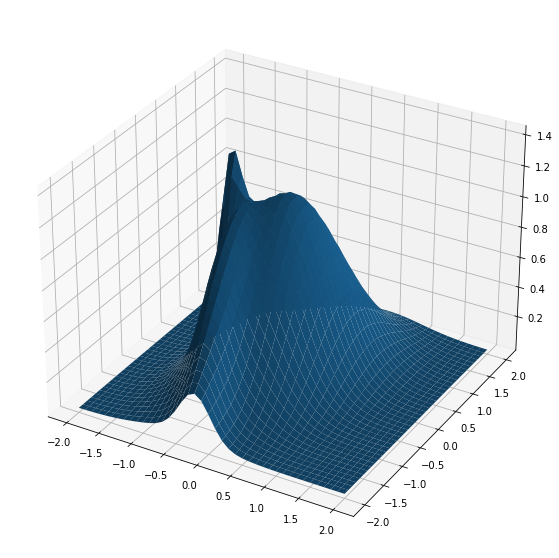

In [ ]:
"""
Read the data set and plot the target pdf.
"""
# Read data
data = np.loadtxt('a017.txt')
# 2D grid values for which the pdf is computed
X = data[:, :2]
# pdf values on the 2D grid
Y = data[:, 2]

fig = plt.figure(figsize=(10,10))

Xgrid0 = X[:,0].reshape(41,41)
Xgrid1 = X[:,1].reshape(41,41)
Ygrid = Y.reshape(41,41)

ax = plt.axes(projection ='3d') 
ax.plot_surface(Xgrid0, Xgrid1, Ygrid)
plt.show()

2. Implement a 2-layer neural network with $D = 2$ input nodes, $K = 1$ output nodes and $M = 50$ hidden nodes in the intermediate layer that can be trained using a sequential error backpropagation procedure, as described in Bishop $\S5.3$. Use $\tanh(\cdot)$ activation functions for the hidden nodes and a linear activation function (regression) for the output node.

In [ ]:
"""
Define the dimensions of the network.

Parameters
----------
d_in : numeric
    Number of input nodes.
d_out : numeric
    Number of output nodes.
d_hidden : numeric
    Number of hidden nodes.
"""
# Network dimension
d_in = 2      # number of input nodes
d_out = 1     # number of output nodes
d_hidden = 50 # number of nodes in hidden layer

First implement the feed-forward procedure, as described in Bishop, Equation (5.10), with `tanh` activation for the hidden layer and linear activation for the output layer.

In [ ]:
def feed_forward(X, w1, b1, w2, b2):
    """
    Create the feed forward function with tanh and linear activations.
    
    Parameters
    ----------
    X  : (N x d_in) array
        Input data.
    w1 : (d_hidden x d_in) array
        Random weights.
    b1 : (d_hidden x 1) array
        Random weights.
    w2 : (d_out x d_hidden) array
        Random weights.
    b2 : (d_out x 1) array
        Random weights.
    
    Returns
    -------
    array
        The output node for each data point.
    """
    z1 = np.tanh(np.dot(w1,X.T)+b1)
    z2 = np.tanh(np.dot(w2,z1)+b2)
    
    return (z1, z2)
    

In [ ]:
"""
Tests for feed_forward.
""" 
w1 = np.zeros((d_hidden, d_in))
b1 = np.zeros((d_hidden, 1))
w2 = np.zeros((d_out, d_hidden))
b2 = np.zeros((d_out, 1))
F = feed_forward(np.zeros((4, d_in)), w1, b1, w2, b2)
np.testing.assert_array_almost_equal(F[-1], np.array([[0, 0, 0, 0]]))


Initialise the weights to random values in the interval $[-1, 1]$. Plot a 2D graph of the initial output of the network over the $[-2,2]\times[-2,2]$ input grid using `ax.plot_surface`.

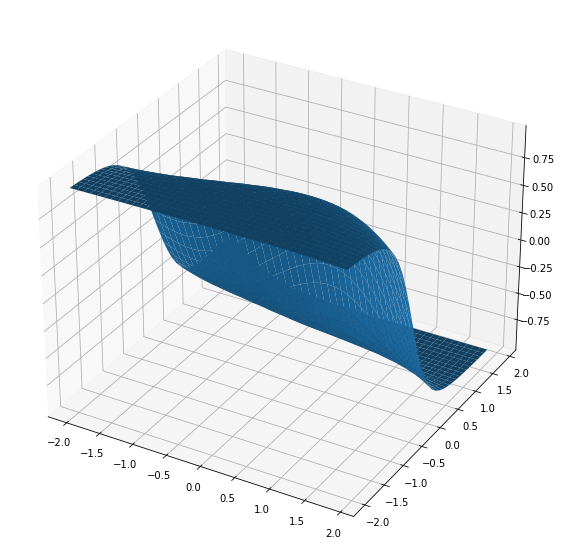

In [ ]:
"""
Plot a 2D graph of the initial output.
"""

# initialize random weights [-1,1]
w1 = (np.random.random((d_hidden, d_in))-0.5)*2
b1 = (np.random.random((d_hidden, 1))-0.5)*2
w2 = (np.random.random((d_out, d_hidden))-0.5)*2
b2 = (np.random.random((d_out, 1))-0.5)*2

# grid
X0,X1 = np.mgrid[-2:2:0.1, -2:2:0.1]
X_in = np.array([X0.flatten(),X1.flatten()]).T
F = feed_forward(X_in, w1, b1, w2, b2)

_infig = plt.figure(figsize=(10,10))
Fgrid = F[-1].reshape(X0.shape)
ax = plt.axes(projection ='3d') 
ax.plot_surface(X0, X1, Fgrid)
plt.show()


3. Train the network on this data set by repeatedly looping over all data points and updating the weights in the network after each loop (epoch). First define the function for training the neural network. Set the learning rate parameter $\eta = 0.01$. Visualization of the network output plays an important role in monitoring the progress, so make sure to include a block of code which display a 2D graph with the current output, just like the plot in the previous part.

In [ ]:
def derivative_tanh(x):
    return (1/np.cosh(x))**2
    
def train_network(X, Y, num_cycles, d_in, d_hidden, d_out, 
                  init_w1, init_b1, init_w2, init_b2,eta=0.01, seed = 2020,
                  batch = False, permute = True, disp_freq = 5):
    """
    The function to train the neural network.

    Parameters
    ----------
    X : N x d_in array
        Input coordinates.
    Y : N x d_out array
        Output probability density.
    num_cycles : integer
        Number of training cycles.
    eta : float
        Learning rate.
    d_in : integer
        Number of input nodes.
    d_hidden : integer
        Number of nodes in hidden layer.
    d_out : integer
        Number of output nodes.
    init_w1 : d_hidden x d_in array
        Initial weights for hidden nodes.
    init_b1 : d_hidden x 1 array
        Initial bias for hidden nodes.
    init_w2 : d_out x d_hidden array
        Initial weights for output node.
    init_b2 : d_out x 1 array
        Initial bias for output node.
    seed : integer
        Seed for reproducible results.
    batch : bool
        Enable batch training. (can be used later in the exercise)
    permute : bool
        Permute inputs and outputs. (can be used later in the exercise)
    disp_freq : integer
        How many times should the results be displayed during training.
    """
    plt.ion() 
    fig=plt.figure()

    w1 = init_w1
    w2 = init_w2
    b1 = init_b1
    b2 = init_b2

    losses = []
    Result=[[],[]]
    if permute:
        X = np.random.permutation(X)

    for epoch in range(num_cycles):
        #forward
        inputs = X

        a1, yhat = feed_forward(inputs, w1, b1, w2, b2)
        a2 = yhat
        
        error = 0.5*np.square(Y-yhat) #equation 5.11 

        #backward 
        deriv_error = (yhat - Y)
        deriv_error_z2 = deriv_error * derivative_tanh(a2)
        deriv_error_z1 = derivative_tanh(a1)*np.dot(w2.T, (derivative_tanh(a2)*deriv_error))
   
        #update
        w2 = w2 - eta * np.dot(a1,deriv_error_z2.T)
        b2 = b2 - eta * deriv_error_z2
        w1 = w1 - eta * np.dot(X.T,deriv_error_z1.T).T
        b1 = b1 - eta * deriv_error_z1
  
        epoch_loss = np.average(error)

        if epoch%disp_freq == 0:
            print(
                "Training loss at step %d: %.4f"
                % (epoch, float(epoch_loss))
            )
            Result[0].append(epoch)
            Result[1].append(epoch_loss)
            plt.plot(Result[0],Result[1])
            plt.xlim(right=num_cycles)

        losses.append(epoch_loss)
    plt.show()

Run the training phase for at least 2000 complete cycles (epochs) and follow the progress by plotting the updated network output after every 200 full cycles. Verify that the output starts to resemble the multimodal density.

Training loss at step 0: 0.3704


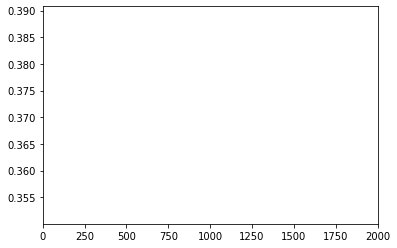

Training loss at step 200: 0.3474


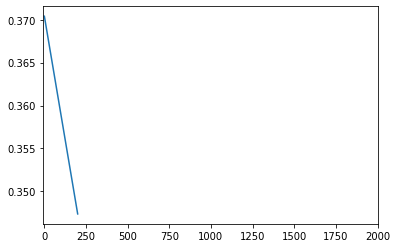

Training loss at step 400: 0.3648


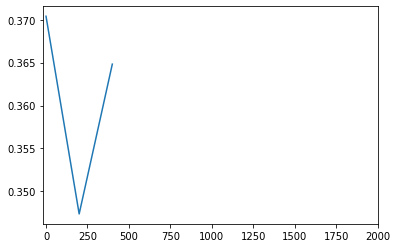

Training loss at step 600: 0.3474


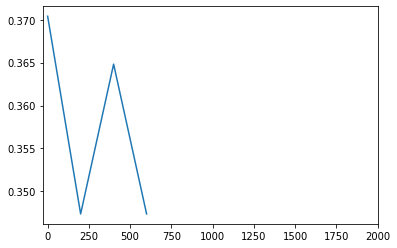

Training loss at step 800: 0.7703


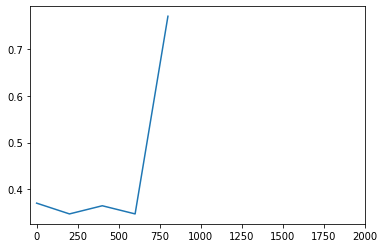

Training loss at step 1000: 0.3474


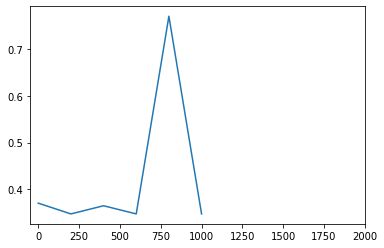

Training loss at step 1200: 0.3431


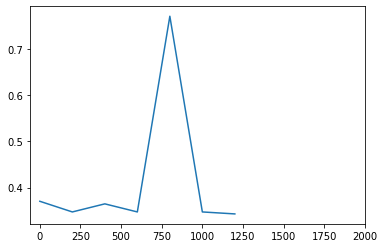

Training loss at step 1400: 0.3474


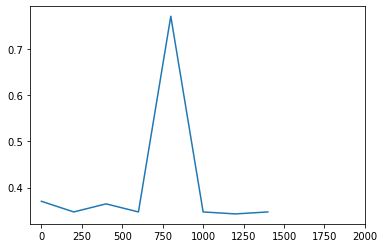

Training loss at step 1600: 0.8171


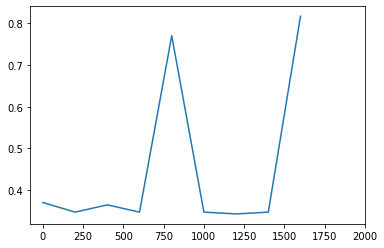

Training loss at step 1800: 0.8171


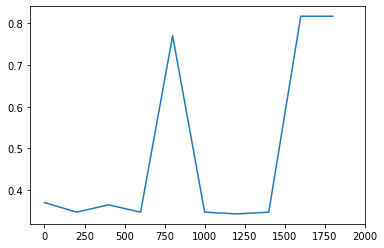

In [ ]:
"""
Train the network for a number of training cycles.
"""
train_network(X, Y, num_cycles= 2000, eta=0.01, d_in=d_in, d_hidden=d_hidden, d_out=d_out, 
                  init_w1=w1, init_b1=b1, init_w2= w2, init_b2=b2, seed = 2020,
                  batch = False, permute = False, disp_freq = 200)

How does the final output of the network compare to the target distribution in the data? Explain. How could you improve the neural network in terms of speed of convergence and/or quality of the approximation?

As you can see when looking at the loss. Which can be high (e.g. 0.8) the final output of the network isn't like the the target distribution of the data.
Thereby, the output starts to resemble the multimodal density.
We hypothesed that this was because the learning rate is to high and the quality of the network would increase when the learning rate would get decreased.
We also noted that a realy small learning rate could decrease thet training speed.
We empirically tested this by reducing the learning rate indeed saw a nice decrease of the loss with a learning rate of 0.0001 after every 200 epochs.

4. Permute the $\mathbf{X}$ and $\mathbf{Y}$ arrays to a random order using the `np.random.permutation` function, keeping corresponding $\mathbf{x}$ and $y$ together. Repeat the network training session using this randomized data set. Verify that convergence is now much quicker. Can you understand why?

Training loss at step 0: 0.2677
Training loss at step 200: 0.5783
Training loss at step 400: 0.5667
Training loss at step 600: 0.5416
Training loss at step 800: 0.5235
Training loss at step 1000: 0.5479
Training loss at step 1200: 0.5411
Training loss at step 1400: 0.5352
Training loss at step 1600: 0.5343
Training loss at step 1800: 0.5252


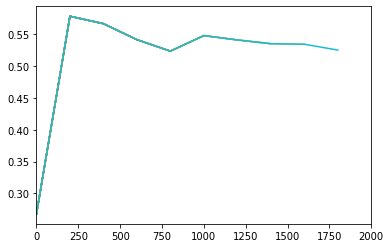

In [ ]:
"""
Train the network for a number of training cycles (epochs) using permuted data as input.
"""
train_network(X, Y, num_cycles= 2000, eta=0.01, d_in=d_in, d_hidden=d_hidden, d_out=d_out, 
                  init_w1=w1, init_b1=b1, init_w2= w2, init_b2=b2, seed = 2020,
                  batch = False, permute = True, disp_freq = 200)

5. Try out the effect of different numbers of hidden nodes, different initial weights and different learning rates on speed and quality of the network training. Explain your results.

__Note:__ Here you can add new cells should you need them.

Parameters: Epochs 1000, eta 0.1000, N_hidden 20
Training loss at step 0: 0.0822
Training loss at step 200: 0.0008
Training loss at step 400: 0.0007
Training loss at step 600: 0.0007
Training loss at step 800: 0.0007


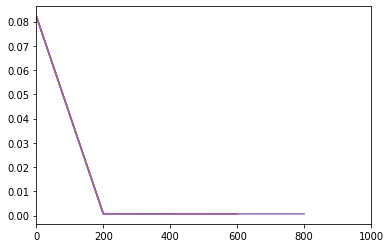

Parameters: Epochs 1000, eta 0.1000, N_hidden 50
Training loss at step 0: 0.0822
Training loss at step 200: 0.0008
Training loss at step 400: 0.0007
Training loss at step 600: 0.0007
Training loss at step 800: 0.0007


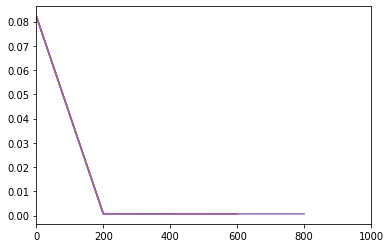

Parameters: Epochs 1000, eta 0.1000, N_hidden 70
Training loss at step 0: 0.0822
Training loss at step 200: 0.0008
Training loss at step 400: 0.0007
Training loss at step 600: 0.0007
Training loss at step 800: 0.0007


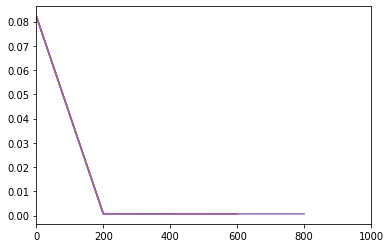

Parameters: Epochs 1000, eta 0.0010, N_hidden 20
Training loss at step 0: 0.0822
Training loss at step 200: 0.0555
Training loss at step 400: 0.0388
Training loss at step 600: 0.0282
Training loss at step 800: 0.0214


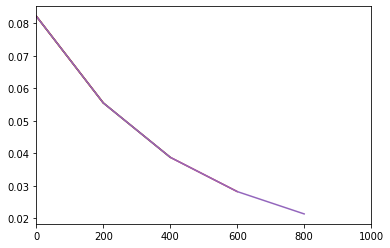

Parameters: Epochs 1000, eta 0.0010, N_hidden 50
Training loss at step 0: 0.0822
Training loss at step 200: 0.0555
Training loss at step 400: 0.0388
Training loss at step 600: 0.0282
Training loss at step 800: 0.0214


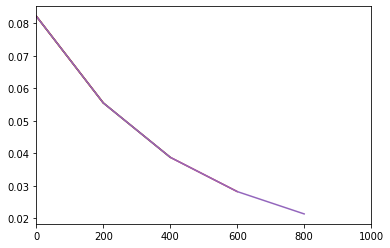

Parameters: Epochs 1000, eta 0.0010, N_hidden 70
Training loss at step 0: 0.0822
Training loss at step 200: 0.0555
Training loss at step 400: 0.0388
Training loss at step 600: 0.0282
Training loss at step 800: 0.0214


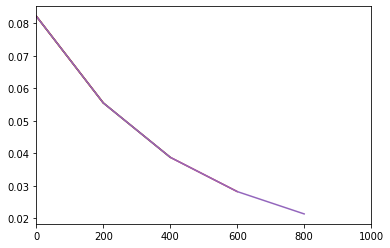

Parameters: Epochs 1000, eta 0.0001, N_hidden 20
Training loss at step 0: 0.0822
Training loss at step 200: 0.0790
Training loss at step 400: 0.0759
Training loss at step 600: 0.0729
Training loss at step 800: 0.0701


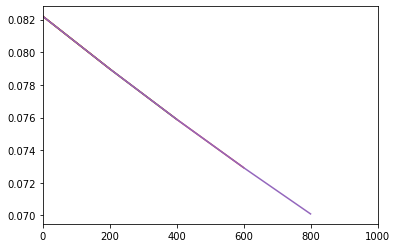

Parameters: Epochs 1000, eta 0.0001, N_hidden 50
Training loss at step 0: 0.0822
Training loss at step 200: 0.0790
Training loss at step 400: 0.0759
Training loss at step 600: 0.0729
Training loss at step 800: 0.0701


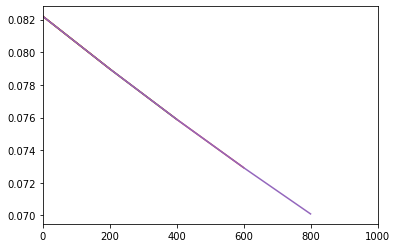

Parameters: Epochs 1000, eta 0.0001, N_hidden 70
Training loss at step 0: 0.0822
Training loss at step 200: 0.0790
Training loss at step 400: 0.0759
Training loss at step 600: 0.0729
Training loss at step 800: 0.0701


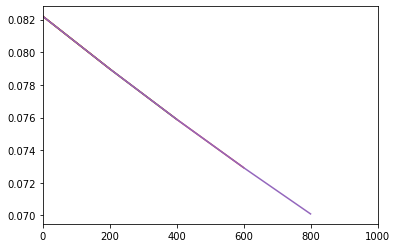

Parameters: Epochs 2000, eta 0.1000, N_hidden 20
Training loss at step 0: 0.0822
Training loss at step 400: 0.0007
Training loss at step 800: 0.0007
Training loss at step 1200: 0.0007
Training loss at step 1600: 0.0007


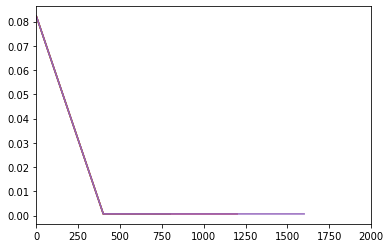

Parameters: Epochs 2000, eta 0.1000, N_hidden 50
Training loss at step 0: 0.0822
Training loss at step 400: 0.0007
Training loss at step 800: 0.0007
Training loss at step 1200: 0.0007
Training loss at step 1600: 0.0007


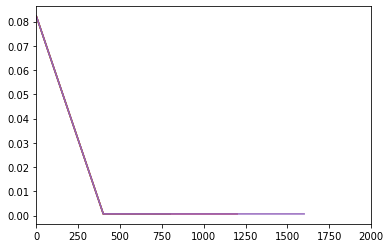

Parameters: Epochs 2000, eta 0.1000, N_hidden 70
Training loss at step 0: 0.0822
Training loss at step 400: 0.0007
Training loss at step 800: 0.0007
Training loss at step 1200: 0.0007
Training loss at step 1600: 0.0007


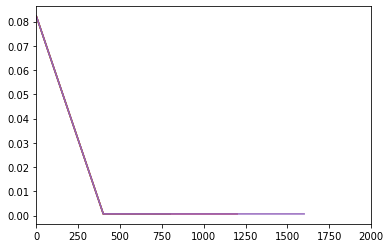

Parameters: Epochs 2000, eta 0.0010, N_hidden 20
Training loss at step 0: 0.0822
Training loss at step 400: 0.0388
Training loss at step 800: 0.0214
Training loss at step 1200: 0.0134
Training loss at step 1600: 0.0092


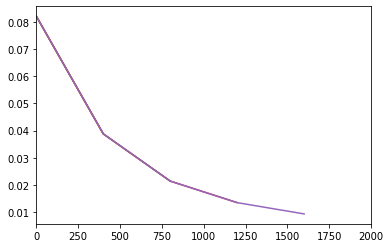

Parameters: Epochs 2000, eta 0.0010, N_hidden 50
Training loss at step 0: 0.0822
Training loss at step 400: 0.0388
Training loss at step 800: 0.0214
Training loss at step 1200: 0.0134
Training loss at step 1600: 0.0092


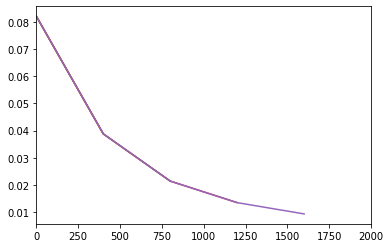

Parameters: Epochs 2000, eta 0.0010, N_hidden 70
Training loss at step 0: 0.0822
Training loss at step 400: 0.0388
Training loss at step 800: 0.0214
Training loss at step 1200: 0.0134
Training loss at step 1600: 0.0092


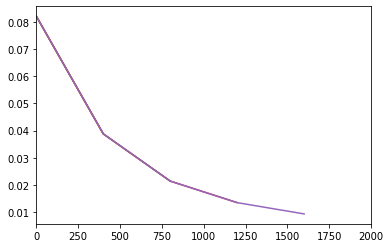

Parameters: Epochs 2000, eta 0.0001, N_hidden 20
Training loss at step 0: 0.0822
Training loss at step 400: 0.0759
Training loss at step 800: 0.0701
Training loss at step 1200: 0.0648
Training loss at step 1600: 0.0599


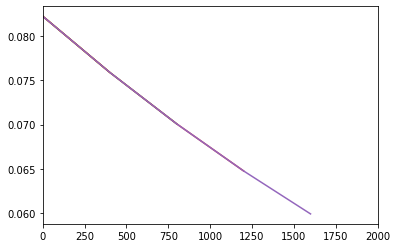

Parameters: Epochs 2000, eta 0.0001, N_hidden 50
Training loss at step 0: 0.0822
Training loss at step 400: 0.0759
Training loss at step 800: 0.0701
Training loss at step 1200: 0.0648
Training loss at step 1600: 0.0599


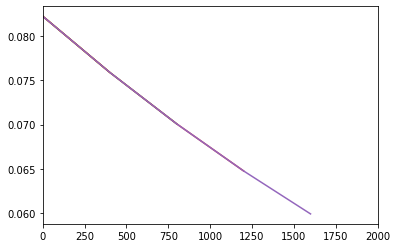

Parameters: Epochs 2000, eta 0.0001, N_hidden 70
Training loss at step 0: 0.0822
Training loss at step 400: 0.0759
Training loss at step 800: 0.0701
Training loss at step 1200: 0.0648
Training loss at step 1600: 0.0599


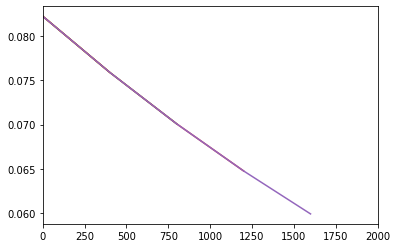

Parameters: Epochs 3000, eta 0.1000, N_hidden 20
Training loss at step 0: 0.0822
Training loss at step 600: 0.0007
Training loss at step 1200: 0.0007
Training loss at step 1800: 0.0007
Training loss at step 2400: 0.0007


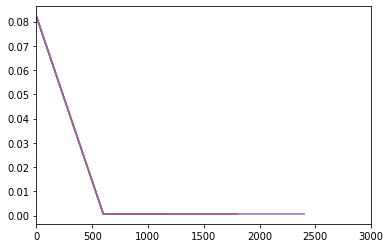

Parameters: Epochs 3000, eta 0.1000, N_hidden 50
Training loss at step 0: 0.0822
Training loss at step 600: 0.0007
Training loss at step 1200: 0.0007
Training loss at step 1800: 0.0007
Training loss at step 2400: 0.0007


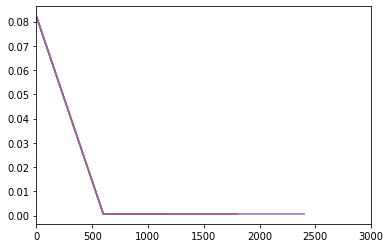

Parameters: Epochs 3000, eta 0.1000, N_hidden 70
Training loss at step 0: 0.0822
Training loss at step 600: 0.0007
Training loss at step 1200: 0.0007
Training loss at step 1800: 0.0007
Training loss at step 2400: 0.0007


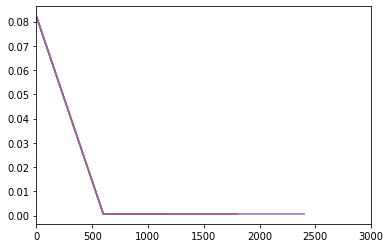

Parameters: Epochs 3000, eta 0.0010, N_hidden 20
Training loss at step 0: 0.0822
Training loss at step 600: 0.0282
Training loss at step 1200: 0.0134
Training loss at step 1800: 0.0079
Training loss at step 2400: 0.0053


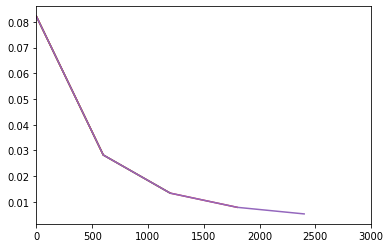

Parameters: Epochs 3000, eta 0.0010, N_hidden 50
Training loss at step 0: 0.0822
Training loss at step 600: 0.0282
Training loss at step 1200: 0.0134
Training loss at step 1800: 0.0079
Training loss at step 2400: 0.0053


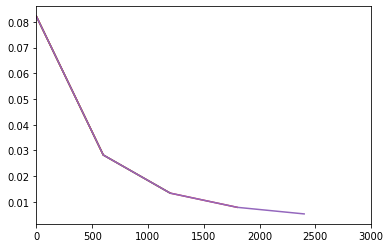

Parameters: Epochs 3000, eta 0.0010, N_hidden 70
Training loss at step 0: 0.0822
Training loss at step 600: 0.0282
Training loss at step 1200: 0.0134
Training loss at step 1800: 0.0079
Training loss at step 2400: 0.0053


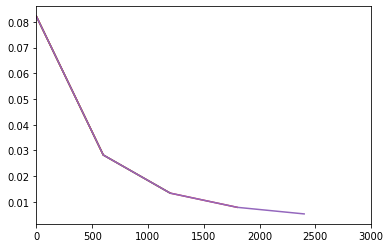

Parameters: Epochs 3000, eta 0.0001, N_hidden 20
Training loss at step 0: 0.0822
Training loss at step 600: 0.0729
Training loss at step 1200: 0.0648
Training loss at step 1800: 0.0577
Training loss at step 2400: 0.0515


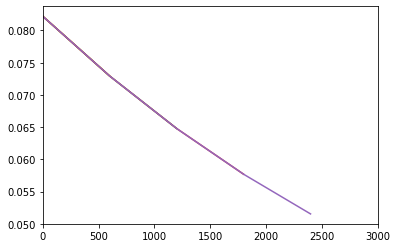

Parameters: Epochs 3000, eta 0.0001, N_hidden 50
Training loss at step 0: 0.0822
Training loss at step 600: 0.0729
Training loss at step 1200: 0.0648
Training loss at step 1800: 0.0577
Training loss at step 2400: 0.0515


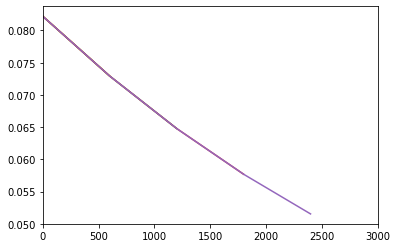

Parameters: Epochs 3000, eta 0.0001, N_hidden 70
Training loss at step 0: 0.0822
Training loss at step 600: 0.0729
Training loss at step 1200: 0.0648
Training loss at step 1800: 0.0577
Training loss at step 2400: 0.0515


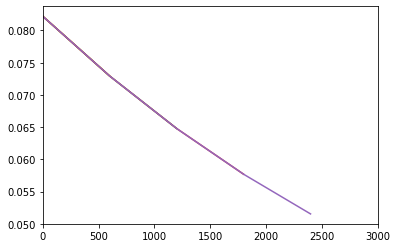

In [ ]:
"""
Train the network using various hyperparameters (hidden nodes, initial weights, learning rates).
"""
n_cycles = [1000,2000,3000]
etas = [0.1,0.001,0.0001]
d_h = [20,50,70]
for cycles in n_cycles:
    for eta in etas:
        for hidden in d_h: 
            w1 = np.zeros((hidden, d_in))
            b1 = np.zeros((hidden, 1))
            w2 = np.zeros((d_out, hidden))
            b2 = np.zeros((d_out, 1))
            print(
                "Parameters: Epochs %d, eta %.4f, N_hidden %d"
                % (cycles, eta, hidden)
            )
            train_network(X, Y, num_cycles=cycles, eta=eta, d_in=d_in, d_hidden=hidden, d_out=d_out, 
                            init_w1=w1, init_b1=b1, init_w2= w2, init_b2=b2, seed = 2020,
                            batch = False, permute = True, disp_freq = int(cycles/5))
